<h1>Project <i>Wolbachia</i> | FizzBuzz</h1>

Chai Hui Qi Jolene, Crystal Lee Zen Yu, Lee Yi Zhang

<h3>Contents Page</h3>

[0. Setting Up](#0)

[1. Introduction](#1)

[2. Visualisation and Evaluation of Dengue](#2)

[3. Visualisation and Evaluation of Project Wolbachia](#3)

[4. Project <i>Wolbachia</i>: Effectiveness in depth](#4)

[5. Future Work](#5)

[6. References](#6)
    
</span>

<a id="0"></a>


<div class="alert alert-block alert-success"><h1>0. Setting Up</h1></div>   

Please install the following packages on **your terminal** before running this notebook :)

In [1]:
### Installing the packages needed ###

# conda install -c conda-forge folium
# conda install geemap -c conda-forge

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import json                         # to work with .geojson data from NEA
import folium                       # interactive visualisation library for geospatial data
from folium.plugins import HeatMap  # heat map package

import ee                           # Earth Engine (API to retrieve world map). Needed to make geemap work
import geemap.eefolium as geemap    # Google Earth Engine; works with folium. We're using it to make the legends.

Additionally, you will be prompted to register for a Google Earth Engine account to use the Google Earth Engine (geemap) features in our code. We have also provided screenshots of the registration process in the zip file for this project, should you need to refer to them.
 
[Link to instructions](https://developers.google.com/earth-engine/guides/python_install-conda)

<a id="1"></a>


<div class="alert alert-block alert-success"><h1>1. Introduction </h1></div> 

<div class="alert alert-block alert-info"><h2>Our Aim</h2></div>

- We aim to analyse the effectiveness of Project Wolbachia in reducing dengue in Singapore, 
- In this project, we have visualised dengue breeding sites, dengue infection cases, and the Wolbachia release sites. This allows us to identify correlations between these variables.
- We also hope to identify if Project Wolbachia’s effectiveness can be further improved, by looking into the specific regions where it was implemented.


<div class="alert alert-block alert-info"><h2>1.1 What is Dengue?</h2></div>

### 1.1.1 Dengue

Dengue is a viral infection that spreads when an infected mosquito bites a human. The dengue virus (DENV) is primarily carried by _Aedes aegypti_ mosquitoes, and is found in tropical and sub-tropical climates.
<img src="Aedes_aegypti_feeding.jpg" alt="drawing" width="200"/> 

***Figure 1:*** *An Aedes aegypti mosquito feeding on human blood*


Dengue produces a wide range of symptoms: ranging from barely noticable to severe and flu-like. The worst cases of dengue are categorized as severe dengue, which is associated with severe bleeding, organ impairment, plasma leakage, and even death.
 __[[source]](https://www.who.int/news-room/fact-sheets/detail/dengue-and-severe-dengue)__


### 1.1.2 How does dengue spread?

Dengue is usually transmitted via the bites of infected female *Aedes aegypti* mosquitoes, in a cycle of transmission that alternates between human and mosquito. A person becomes infected with dengue when they are bitten by an infected mosquito; and a mosquito becomes infected with dengue when it bites an infected person. Thus, the virus must pass from person to mosquito to person and so on in its cycle of transmission.


When a person is bitten by an infected *Aedes* mosquito, they will develop viremia - a high level of the dengue virus in the blood, after a four-day delay. Viremia usually lasts for approximately five days. During viremia, a person may not show symptoms of dengue until after the fifth day.


In order for a mosquito to successfully become a vector, it must take its blood meal during viremia, where the infected person's blood has sufficiently high levels of the dengue virus. Once the virus enters the mosquito, it takes eight to twelve days before becoming infectious. (Male mosquitoes __[do not bite humans](https://www.nea.gov.sg/corporate-functions/resources/research/wolbachia-aedes-mosquito-suppression-strategy/male-mosquitoes-do-not-bite)__ as they only feed on plant juices. Female mosquitoes require proteins from blood for egg development.)


The mosquito will remain infected with the virus for its entire life - about 3-4 weeks. Infected mosquitoes can continue transmitting the dengue virus to healthy people for the rest of their life spans.


### 1.1.3 The Four Serotypes of DENV

There are four serotypes of dengue which cause dengue fever: DENV-1, DENV-2, DENV-3, and DENV-4. These four viruses are called serotypes because each have different interactions with the antibodies in human blood. While there is some genetic variation between the serotypes, infection with any of the serotypes results in the same disease and range of clinical symptoms.

<img src="denv-four-serotypes.jpg" alt="drawing" width="600"/> 

***Figure 2:*** *The Four Serotypes of Dengue*

<div class="alert alert-block alert-info"><h2>1.2 Why is Dengue a Concern?</h2></div>

### 1.2.1 Dengue is a global concern

<img src="dengue-cases-worldwide-2021.jpg" alt="drawing" width="700"/>

***Figure 3:*** *Global distribution of Dengue in 2021*

As pictured in Figure 3, we can see that dengue affects many countries, denoted by the darker grey shading. The size of the red circles is proportional to the number of dengue cases found in each country. The occurrence of dengue is markedly high near the equator, as shown by the clustering of red circles around the equator.


In particular, Singapore and the countries surrounding it are plagued by dengue. Given the increased interconnectedness of our world and regular international travel, we cannot afford to ignore the dengue situation in our neighbouring countries. Even if Singapore manages to eradicate dengue, as dengue requires human hosts in its transmission cycle, it could still spread to us again very easily from neighbouring countries. This is especially concerning given the economic and healthcare costs of tackling and treating dengue.


### 1.2.2 Dengue Haemorrhagic Fever (DHF)

Despite most dengue cases being asymptomatic, dengue can manifest as Dengue Haemorrhagic Fever (DHF), also known as severe dengue or Dengue Shock Syndrome. According to the [Centers for Disease Control and Prevention]('https://www-sciencedirect-com.libproxy1.nus.edu.sg/science/article/pii/S1570963912002117'), the critical feature that distinguishes DHF from dengue fever is not haemorrhaging, but rather plasma leakage resulting from increased vascular permeability.


In DHF, the infected person’s blood vessels become damaged and leaky. Their platelet count also falls, preventing proper blood clotting. This may result in internal bleeding and organ failure. In the worst cases, plasma leakage may be so severe that the person goes into shock - a phenomenon known as Dengue Shock Syndrome (DSS). Fatality rates of DSS can go up to [44%]('https://pubmed-ncbi-nlm-nih-gov.libproxy1.nus.edu.sg/9752834/').


### 1.2.3 Serotypes complicate the picture

After recovering from an infection with one dengue serotype, a person has immunity against that particular serotype. 


Although there is some cross-immunity between serotypes, this immunity is partial, and temporary, lasting only two to three months. After this period, the individual can be reinfected by any of the other remaining serotypes. Thus the person becomes susceptible to dengue again.


Critically, subsequent infections by a *different* serotype greatly increases the risk of developing DHF. Given that all four serotypes are circulating in Singapore, anyone who has ever been infected with dengue is at an elevated risk of DHF should they become infected with a different serotype in the future. Thus, despite initial dengue infections being relatively asymptomatic, the continuing prevalence of dengue means that Singaporeans face an elevated risk of the debilitating health effects of DHF.


<div class="alert alert-block alert-info"><h2>1.3 Dengue in Singapore</h2></div>

Here, we have visualised dengue and DHF cases in Singapore from 2014 to 2018.

In [3]:
### Reading the data ###

weekly_dengue_cases = pd.read_csv(
    "weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases.csv")

#### (a) Table of Dengue and DHF cases per year in Singapore between 2014 to 2018

In [4]:
### Grouping the data to look at the statistics ###

year_group = weekly_dengue_cases.groupby(["year","type_dengue"]).agg(["sum"])['number']
year_group["sum"] = year_group["sum"].astype(int)
year_group.reset_index(inplace=True)
year_group

,year,type_dengue,sum
0,2014,DHF,20
1,2014,Dengue,18306
2,2015,DHF,12
3,2015,Dengue,11282
4,2016,DHF,24
5,2016,Dengue,13061
6,2017,DHF,17
7,2017,Dengue,2750
8,2018,DHF,26
9,2018,Dengue,3257


Next, we plotted this data as separate bar graphs for total dengue cases and DHF cases. We also plotted a line graph showing DHF cases as a percentage of total dengue cases.

#### (b) Graphs of Total Dengue and DHF cases per year in Singapore

In [5]:
### Split type of dengue into DHF and total dengue ###

mask_1 = year_group['type_dengue'] == 'DHF'
mask_2 = year_group['type_dengue'] == 'Dengue'
year_dhf = year_group[mask_1]
year_dengue = year_group[mask_2]

In [6]:
### Making a new DataFrame ###

data = {
    'year': ["2014", "2015", "2016", "2017", "2018"],
    'Dengue': [18306, 11282, 13061, 2750, 3257],
    'DHF': [20, 12, 24, 17, 26]
}
total_dengue_DHF = pd.DataFrame(data)
total_dengue_DHF.set_index("year", inplace=True)

### Calculating % of DHF, Adding to a new column ###

total_dengue_DHF["Total Dengue and DHF"] = total_dengue_DHF[
    "Dengue"] + total_dengue_DHF["DHF"]
total_dengue_DHF["% of DHF"] = total_dengue_DHF["DHF"] / total_dengue_DHF[
    "Total Dengue and DHF"] * 100


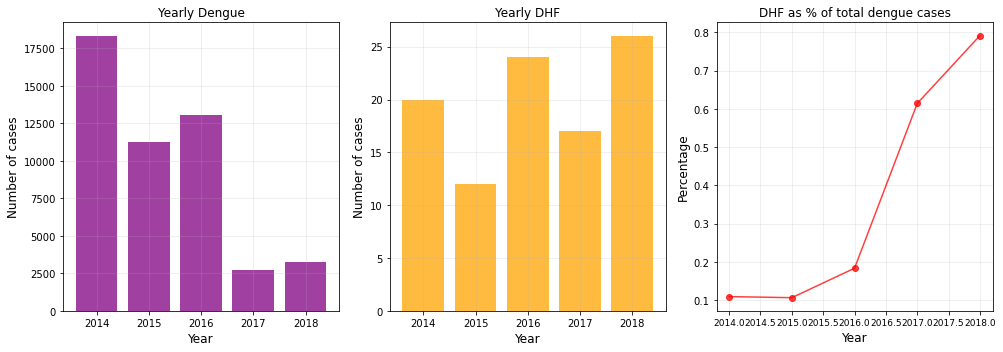

In [7]:
### Subplots ### 
 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 5)) 
 
ax[0].bar(year_dengue['year'], year_dengue['sum'], alpha=0.75, color='purple')          ## Subplots for yearly dengue 
ax[1].bar(year_dhf['year'], year_dhf['sum'], alpha=0.75, color='orange')                ## Subplots for yearly DHF 
ax[2].plot(year_dhf['year'],                                                            ## SUbplots for DHF as % of total 
           total_dengue_DHF["% of DHF"], 
           alpha=0.75, 
           color='red', 
           marker='o') 
 
### Labelling the axes ### 
 
for i in range(3): 
    ax[i].grid(True, alpha=0.25) 
    ax[i].set_xlabel("Year", size=12) 
    ax[i].set_ylabel("Number of cases", size=12) 
 
plt.xticks(rotation=0, horizontalalignment="center", size=9) 
 
ax[0].set_title("Yearly Dengue", size=12) 
ax[1].set_title("Yearly DHF", size=12) 
ax[2].set_ylabel("Percentage") 
ax[2].set_title("DHF as % of total dengue cases") 
 
plt.tight_layout() 
plt.show()

#### (c) Analysis of graphs
The total dengue cases (purple) have fallen by approximately 82%, from 18306 cases in 2014 to only 3257 cases in 2018. DHF cases (orange) have increased overall, from 20 cases in 2014 to 26 cases in 2018. 


Although the number of DHF cases might seem small, looking at the line graph, the percentage of dengue cases that are DHF has increased significantly, increasing eightfold from only 0.1% in 2014 to 0.8% in 2018. This indicates that the proportion of DHF cases is increasing, which is concerning since DHF has a severe impact on the infected’s health.


Furthermore, even though there is only a small percentage of DHF cases currently, the numbers might continue to rise in the future.. We cannot turn a blind eye to the fact that everyone else who has been infected with mere “normal” dengue has a much higher risk of developing DHF should they be re-infected with a different dengue serotype. Following this trend, we can predict that the proportion of DHF cases will only continue to rise in the future.


It is thus of utmost importance to completely stamp out the disease regionally in order to avoid the health, economic and mortal cost of dengue.


<div class="alert alert-block alert-info"><h2>1.4 Project Wolbachia</h2></div>

How then is Singapore fighting dengue?


In 2016, the National Environmental Agency (NEA) began implementing Project *Wolbachia*. By releasing sterile male *Wolbachia*-carrying *Aedes aegypti* (*Wolbachia-Aedes*) mosquitoes on a regular basis in dengue hotspots, this prevents mosquitoes from reproducing. When urban mosquito populations fall, mosquito-borne disease transmission is reduced. Thus, the incidence of dengue infections increases.

## 1.4.1 The biology behind Project *Wolbachia*

*Wolbachia* is a genus of bacteria that infects many species of insects, including mosquitoes. Although *Aedes* mosquitoes do not usually carry *Wolbachia*, they can be infected with *Wolbachia* via egg microinjection. This is done in NEA’s mosquito breeding facilities.


*Wolbachia* affects male and female *Aedes* mosquitoes slightly differently.


- A male *Wolbachia-Aedes* mosquito that mates with a wild female causes the production of eggs that do not hatch. The non-viability of eggs is due to cytoplasmic incompatibility (CI). Although no definitive research has explained the mechanism of CI in *Wolbachia-Aedes* mosquitoes, scientists believe that *Wolbachia* modifies mosquito sperm, preventing them from fertilising eggs.
- A female *Wolbachia-Aedes* mosquito that mates with a wild male will produce viable male and female offspring.
- If both the male and female are infected with *Wolbachia*, they will produce viable male and female offspring.


<img src="cytoplasmic-incompatibility.png" alt="drawing" width="700"/>

***Figure 4:*** *Mating of mosquitoes with and without* Wolbachia

NEA has exploited this property of *Wolbachia-Aedes* in Project *Wolbachia* in two ways.
 
Firstly, by producing both male and female *Wolbachia-Aedes* mosquitoes, the egg microinjection process only has to be done once. (NEA also conduct quality control checks to ensure that their stock of *Wolbachia-Aedes* mosquitoes do contain *Wolbachia*.)
 
Secondly, Project *Wolbachia* is a *suppression* strategy, which aims to reduce urban mosquito populations. By only releasing male *Wolbachia-Aedes* mosquitoes, subsequent matings will result in non-viable eggs, reducing the *Aedes* mosquito population over time. This is in contrast to *replacement* strategies, which release both male and female *Wolbachia-Aedes* mosquitoes in a bid to infect all mosquitoes with *Wolbachia*. For more information on why Singapore has decided to use a suppression strategy instead of a replacement strategy, you may refer to __[this link](https://www.nea.gov.sg/corporate-functions/resources/research/wolbachia-aedes-mosquito-suppression-strategy/why-wolbachia-aedes-suppression-technology)__.
 
Project *Wolbachia* is safe and natural. *Wolbachia* poses a negligible risk to human, animal and environmental health, as it is already found in the wild  and has been found to not pose a risk to human health. Furthermore, *Wolbachia* cannot survive outside its mosquito host, and will not be transmitted to humans through mosquito bites.



 
## 1.4.2 Implementation of Project *Wolbachia*

Currently, Project *Wolbachia* is still in a pilot stage, and is only being tested in a few key neighbourhoods which have been identified to be dengue hotspots. NEA releases Wolbachia-carrying male mosquitoes around residential blocks and along common corridors of selected high-risk estates, on a biweekly basis.
 
 
Here are a few key steps in the implementation of Project *Wolbachia*.
1. Researchers produce the first batch of  *Wolbachia-Aedes* mosquitoes through egg microinjection.
2. Researchers mass-produce *Wolbachia-Aedes* mosquitoes (without the need for subsequent microinjections).
3. Mosquito pupae are sorted by sex (male pupae are smaller than female ones).
4. Adult male *Wolbachia-Aedes* mosquitoes are released in selected test locations.
5. The released male *Wolbachia-Aedes* mosquitoes mate with urban wild females, and die after about a week.
6. Resulting eggs are non-viable, no new mosquitoes hatch.
7. Urban mosquito population falls.
8. Transmission of DENV is reduced.
 
As of 2022, HDB estates being studied include Bukit Batok, Choa Chu Kang, Tampines and Yishun. NEA has plans to expand the mosquito release zones to Nee Soon Central and Nee Soon South.

<img src="progress-of-project-wolbachia-timeline.png" alt="drawing" width="900"/>

***Figure 5:*** *NEA’s phased approach to Project* Wolbachia


In addition, *Wolbachia-Aedes* suppression technology has been implemented in other countries such as Australia, China, Thailand, and the United States. This also reduces the transmission of other mosquito-borne diseases besides dengue, such as Zika, yellow fever and chikungunya.


<a id="2"></a>


<div class="alert alert-block alert-success"><h1>2. Visualisation and Evaluation of Dengue</h1></div>

To examine the effectiveness of Project Wolbachia, we plotted data from data.gov.sg. Unfortunately, as only data from 2021 is available, all our visual analysis is based on a single time point. 

This corresponds to after Phase 5 in the phased approach infographic above, where Project Wolbachia has been implemented in Chua Chu Kang, Bukit Batok, Tampines and Yishun.

<div class="alert alert-block alert-info"><h2>2.1 <i>Aedes</i> Mosquito Breeding Grounds across Singapore </h2></div>

We plotted the breeding grounds of *Aedes* mosquitoes as listed on the NEA website. 
 
Since mosquitoes only fly a total of approximately __[300m](https://pubmed-ncbi-nlm-nih-gov.libproxy1.nus.edu.sg/15642001/)__ in their lifetime, we also drew circles (r = 300m) centered on each breeding site to denote the maximum possible distance mosquitoes can fly from their breeding sites.


In [8]:
### Dictionary of breeding habitat filenames ###

breeding_habitats_dict = {
    "Central": 'aedes-mosquito-breeding-habitats-central-geojson.geojson',
    "Northeast": 'aedes-mosquito-breeding-habitats-north-east-geojson.geojson',
    "Northwest": 'aedes-mosquito-breeding-habitats-north-west-geojson.geojson',
    "Southeast": 'aedes-mosquito-breeding-habitats-south-east-geojson.geojson',
    "Southwest": 'aedes-mosquito-breeding-habitats-south-west-geojson.geojson'
}

### Specific breeding habitat locations ###

"""These coordinates were found manually by googling the locations listed on the NEA website"""

radius_dict = {
    "Robin_Lane": [1.319319, 103.826821],
    "Kim_Keat_Link": [1.329962, 103.856098],
    "Lorong_Tanggam": [1.395309, 103.874289],
    "Lorong_eight_Toa_Payoh": [1.340814, 103.854507],
    "Eunos_Link": [1.330164, 103.904831],
    "Marsiling_Rise": [1.439303, 103.779266],
    "Yishun_Ring_Road": [1.435135, 103.836552],
    "Jalan_Angin_Laut": [1.337418, 103.955366],
    "Pioneer_Road_North": [1.340926, 103.694802],
    "Bukit_Batok_Street_thirty_one": [1.359194, 103.748374],
    "Keat_Hong_Park": [1.378578, 103.733923]
}

In [9]:
### Setting up the map ###

location_singapore = [1.3521, 103.8198]

combined_breeding_ground_map = geemap.Map(location=location_singapore,
                                          width=900,
                                          height=600,
                                          tiles="cartodbpositron",
                                          zoom_start=11.5,
                                          zoom_control=False,
                                          scrollWheelZoom=False,
                                          dragging=True)

### Putting breeding grounds into the map ###

for place, filename in breeding_habitats_dict.items():  # Accessing the breeding ground files
    folium.Choropleth(
        geo_data=filename,
        fill_color="black",
        fill_opacity=0.8,
        line_color="black",
        line_opacity=0.9,
        name=place                                      # adding the region names to the dropdown menu
    ).add_to(combined_breeding_ground_map)

### Drawing 300m radius circles at each breeding ground ###

for place in radius_dict:
    folium.Circle(
        radius_dict[place],
        radius=300,
        color="crimson",
        fill=True,
        name=place
    ).add_to(combined_breeding_ground_map)

### Adding a legend ###

labels = ['300m radius', 'Breeding locations']
colors = ['#DC143C', '#000000']

combined_breeding_ground_map.add_legend(title='Legend',
                                        labels=labels,
                                        colors=colors,
                                        opacity=0.8)
folium.LayerControl(autoZIndex=False).add_to(combined_breeding_ground_map)

combined_breeding_ground_map

# ↓  click the space to the left of the map to expand it! (below Out[8])
# ↓ toggling "Google Maps" in the dropdown menu will remove the landmark information for a cleaner view

### Analysis 

The red circle surrounding each breeding ground location represents the 300m maximum range that a mosquito could fly to bite humans. These hotspots represent high risk areas for dengue infection.


<div class="alert alert-block alert-info"><h2>2.2 Correlation between Breeding Grounds and Dengue Cases </h2></div>

Next, we added the locations of dengue cases to the map of dengue hotspots.

In [10]:
### Dictionary of dengue infection cases filenames ###

dengue_cases_dict = {"dengue_cases_central": 'dengue-cases-central-geojson.geojson',
                     "dengue_cases_northeast": 'dengue-cases-north-east-geojson.geojson',
                     "dengue_cases_southeast": 'dengue-cases-south-east-geojson.geojson',
                     "dengue_cases_southwest": 'dengue-cases-south-west-geojson.geojson'}

In [11]:
### Setting up the map ###

location_singapore = [1.3521, 103.8198]

correlation_map = geemap.Map(
    location=
    location_singapore,           #geemap allows us to make a legend (folium doesn't have it)
    width=900,
    height=600,
    tiles="cartodbpositron",
    zoom_start=11.5,
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=True)

breeding_grounds = folium.FeatureGroup(name='Breeding Grounds')
cases = folium.FeatureGroup(name='Dengue Cases')

### Mapping dengue infection cases ###

for place, filename in dengue_cases_dict.items(
):  # Accessing the dengue infection cases files
    folium.Choropleth(
        geo_data=filename,
        fill_color="salmon",
        fill_opacity=0.8,
        line_color="red",
        line_opacity=0.9,
        name=place                 #adding the region names to the dropdown menu
    ).add_to(cases)

### Mapping dengue breeding grounds ###

for i in breeding_habitats_dict:
    folium.Choropleth(geo_data=breeding_habitats_dict[i],
                      fill_color="cadetblue",
                      fill_opacity=0.8,
                      line_color="blue",
                      line_opacity=0.9,
                      name="Breeding Data").add_to(breeding_grounds)

### Combining the breeding grounds map with dengue cases map ###

cases.add_to(correlation_map)
breeding_grounds.add_to(correlation_map)

### Adding a legend ###

labels = ['Dengue Infection Cases', 'Breeding locations']
colors = ['#DC143C', '#0000FF']
correlation_map.add_legend(title='Legend',
                           labels=labels,
                           colors=colors,
                           opacity=0.8)

folium.LayerControl(autoZindex=False).add_to(correlation_map)

correlation_map

# ↓  click the space to the left of the map to expand it! (below Out[10])
# ↓ toggling "Google Maps" in the dropdown menu will remove the landmark information for a cleaner view

### Analysis

From the map above, we can see that dengue outbreaks (in red) are close to regions where the *Aedes* mosquito breeding grounds have been spotted. Generally, there seems to be more dengue cases in regions with higher residential population (i.e. the East) than regions with higher industrial activities (i.e. the West). 

<div class="alert alert-block alert-info"><h2>2.3 Correlation between Dengue Cases and Human Population Density</h2></div>

Next, we added Singapore's population density to the map of dengue cases.

In [12]:
### Setting up the map ###

location_singapore = [1.3521, 103.8198]

combined_dengue_cases_map = geemap.Map(
    location=location_singapore,                   #no legend needed so we used folium
    width=900,
    height=600,
    tiles="cartodbpositron",
    zoom_start=11.5,
    zoom_control=False,
    scrollWheelZoom=False,
    dragging=True)

### Mapping dengue infection cases ###

for place, filename in dengue_cases_dict.items():
    folium.Choropleth(
        geo_data=filename,
        fill_color="black",
        fill_opacity=0.8,
        line_color="black",
        line_opacity=0.9,
        name="Dengue Cases"                         #adding to the dropdown menu
    ).add_to(combined_dengue_cases_map)

### Importing population density data from @kssujith on github ###

data = 'planning-area.geojson'
geo_df = pd.read_csv(
    "https://github.com/kssujith92/Coursera_Capstone/raw/main/Final_Project/Data/location_subzones.csv"
)
# geo_df contains the first set of data: longitude and latitude of subzones

geo_df = geo_df.rename(columns={"Zone": "Subzone"})
pop_df = pd.read_csv(
    'https://github.com/kssujith92/Coursera_Capstone/raw/main/Final_Project/Data/population_subzones.csv'
)
# pop_df contains the second set of data: population numbers according to subzones


### Merging @kssujith's datasets based on Common Subzones (how they formatted their data) ###

df = pop_df.merge(geo_df, on='Subzone', how='inner')
# combing geo_df (latitude and longitude) with pop_df (population numbers) to get population density in one dataframe

### Only keeping necessary columns ###

df_new = df[['Subzone', 'Population', 'Latitude', 'Longitude']]

### Feeding the population density data into HeatMap ###

heat_data = [[row['Latitude'], row['Longitude']]
             for index, row in df_new.iterrows()]
HeatMap(heat_data,
        max_zoom=20,
        radius=30,
        blur=45,
        control=True,
        name='Population Density',
        show=False).add_to(combined_dengue_cases_map)

### Adding a legend ###

labels = ['Dengue Cases']
colors = ['#000000']
correlation_map.add_legend(title='Legend',
                           labels=labels,
                           colors=colors,
                           opacity=0.8)


### Adding layer controls ###

folium.LayerControl(collapsed=False).add_to(combined_dengue_cases_map)

combined_dengue_cases_map

# ↓ toggle "Population Density" in the dropdown menu 
# ↓ toggling "Google Maps" in the dropdown menu will remove the landmark information for a cleaner view 

### Analysis

From this heatmap of population density overlayed with the dengue cases map, we can clearly observe a positive correlation between dengue cases and population density. This is likely to be due to how the transmission of dengue is human-dependent.

## Summary of Section 2 

In Section 2.1, we first looked at potential high-risk locations by demarcating 300m-radius circles around neighbourhoods where dengue breeding spots have been recorded. 


Following which, in Section 2.2 we inspected the map showing breeding grounds and dengue cases. As mentioned above, locations with breeding grounds generally have higher dengue outbreaks, although the correlation is not very strong. 


Lastly, in Section 2.3, we also explored another possible factor that could affect the number of dengue outbreaks, which is the human population density. This was driven by the hypothesis that the greater the number of residents in a neighbourhood, the higher the risk of dengue transmission. Indeed, we observed an overlap in areas with both high population density and high dengue cases. However, there also remain  areas with a large number of residents but few dengue outbreaks.  
 
 
Although we cannot reliably conclude that breeding grounds and/or population density are key contributing factors to dengue outbreaks, we can still see that there still exists some correlation between dengue cases and breeding grounds, as well as dengue cases and human population density.

<a id="3"></a>


<div class="alert alert-block alert-success"><h1>3. Visualisation and Evaluation of Project Wolbachia</h1></div>

<div class="alert alert-block alert-info"><h2>3.1 General Effectiveness of Project Wolbachia</h2></div>  

### Background context


Since Project *Wolbachia* commenced in late 2016, by observing the periods before and after 2016 we can analyse its effectiveness when implemented.

The data used in the table below is that of dengue cases per year from 2011-2020.

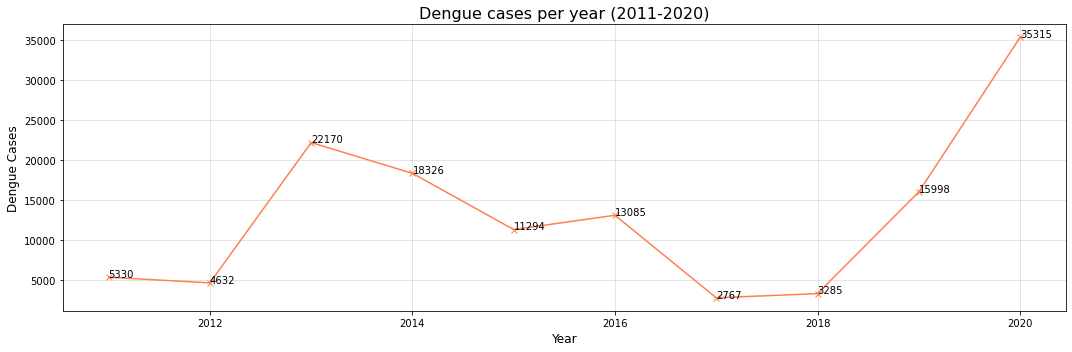

In [13]:
### 2011 - 2020 data from statistica ###

Year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Dengue_cases = [
    5330, 4632, 22170, 18326, 11294, 13085, 2767, 3285, 15998, 35315
]

### Plotting the data on a line graph ###

plt.figure(figsize=(15, 5))
plt.grid(alpha=.25, color='gray')
plt.plot(Year, Dengue_cases, 'x-', color='coral')
plt.title('Dengue cases per year (2011-2020)', size=16)
plt.xlabel('Year', size=12)
plt.ylabel('Dengue Cases', size=12)

### Labelling plot points ###

for i, txt in enumerate(Dengue_cases):
    plt.annotate(txt, (Year[i], Dengue_cases[i]))

plt.tight_layout()
plt.show()

### Analysis

From the above plot, we can guess that Project *Wolbachia* has been effective in the short term. Immediately after implementation in 2016, the number of dengue cases fell from 13 085 cases in 2016 to 2767 cases in 2017, remaining low at 3285 cases in 2018. 


However, in 2019 and 2020, there was a steep increase in the number of dengue cases, at 15 998 cases and 35 315 cases respectively. This could have been due to the beginning of the Covid-19 pandemic in 2020. At that time, the government imposed the Circuit Breaker and reduced workforce capacity in a bid to stem the spread of the virus. This meant that almost everyone was working from home.

Since residential areas have a greater female *Aedes* population, it was very likely that increased amount of time spent at home had driven the rise in dengue cases during that period. According to the deputy director of the emerging infectious diseases programme at Duke-NUS Medical School, Professor [Ooi Eng Eong]('https://www.straitstimes.com/singapore/dengue-outbreak-threatens-to-be-biggest-yet'), the "*Aedes* mosquitoes are active in seeking blood meals during the daytime and more people spending time at home instead of at work... could have led to the increased rates of infection." A [study]('https://academic-oup-com.libproxy1.nus.edu.sg/jid/article/223/3/399/5916376?login=true#227899716') published in 2020 also found a positive correlation between Safe Distancing Measures and Dengue cases. 


Additionally, the NEA recorded a fivefold increase in *Aedes* mosquito larvae detected in homes and common corridors in residential areas during the Circuit Breaker period as compared to the previous two months, despite efforts in Project *Wolbachia*.


As such, the rapid increase of dengue was probably not due to the ineffectiveness of Project *Wolbachia*, but rather as a result of the  pandemic which led to drastic changes in Singaporeans' lifestyles. An increased amount of time spent at home without adequate mosquito suppression strategies taken by households made it very easy for the *Aedes* mosquitoes to reproduce and proliferate, thus driving up dengue infection cases.

<div class="alert alert-block alert-info"><h2>3.2 Wolbachia-Aedes Mosquito Release Areas </h2></div> 

Now that we have analysed the overall trend of Dengue cases in Singapore before and after Project Wolbachia was implemented, we can delve deeper into the specific regions where *Wolbachia-Aedes* mosquitoes were released in order to ascertain the true effectiveness of Project Wolbachia. 

It would be misleading to consider total Dengue outbreak cases when considering the Project's effectiveness, given that the Project is only implemented in selected neighbourhoods and not island-wide.  Currently, Project *Wolbachia* is only employed in 4 neighborhoods: Chua Chu Kang, Bukit Batok, Tampines and Yishun. Thus, it would be more accurate to ascertain the effectiveness of Project *Wolbachia* by only examining dengue cases in these 4 neighborhoods.

In [14]:
### Coordinates for neighbourhood boundaries ###
"""These coordinates were manually and painfully obtained in a clockwise manner, based on images from the NEA website."""
"""Chua Chu Kang and Yishun were further divided into a few regions in the NEA source. Thus we used dictionaries to store the coordinates for each shape."""

# Chua Chu Kang (has two shapes)
CCK_coordinates_dict = {
    "CCK_coordinates_1": [(1.382560, 103.737090), (1.381506, 103.735847), (1.379878, 103.737312), (1.380855, 103.738367)],
    
    "CCK_coordinates_2": [(1.383725, 103.742686), (1.381776, 103.743327), (1.380954, 103.743928), (1.376750, 103.753130), 
                          (1.376568, 103.753968), (1.379174, 103.759814), (1.380660, 103.758950), (1.381600, 103.756206), 
                          (1.380645, 103.755859), (1.381197, 103.754569), (1.381955, 103.754812), (1.382441, 103.753906),
                          (1.383040, 103.754509), (1.383545, 103.752880), (1.382846, 103.752564), (1.382682, 103.750411), 
                          (1.382356, 103.750072), (1.383529, 103.747431), (1.383982, 103.746987), (1.384872, 103.746387)]
                        }

# Bukit Batok
BKBT_coordinates = [(1.364831, 103.743657), (1.364314, 103.744472), (1.364298, 103.745486), (1.362767, 103.745453),
                    (1.362668, 103.744256), (1.361729, 103.744242), (1.360962, 103.745406), (1.359322, 103.746947),
                    (1.356427, 103.747218), (1.356598, 103.749103), (1.355666, 103.749295), (1.355640, 103.750141),
                    (1.354499, 103.750170), (1.353467, 103.751406), (1.353455, 103.752494), (1.354329, 103.753345),
                    (1.354632, 103.753275), (1.354587, 103.752031), (1.356445, 103.751943), (1.356532, 103.753247),
                    (1.356965, 103.753295), (1.358174, 103.751616), (1.362023, 103.751605), (1.362077, 103.752556),
                    (1.365390, 103.753138), (1.365662, 103.753671), (1.366880, 103.753404), (1.366505, 103.751347),
                    (1.363925, 103.751560), (1.363861, 103.748856), (1.365359, 103.748790), (1.365272, 103.746763),
                    (1.365582, 103.746176), (1.366238, 103.745652), (1.366320, 103.745210)]

# Tampines
TAMP_coordinates = [(1.354215, 103.929814), (1.351176, 103.928255), (1.350602, 103.929393), (1.344930, 103.938259),
                    (1.345174, 103.940757), (1.346357, 103.943030), (1.344047, 103.945096), (1.345562, 103.946720),
                    (1.345610, 103.948792), (1.344430, 103.949966), (1.350636, 103.958301), (1.350989, 103.960574),
                    (1.350713, 103.962683), (1.352070, 103.963484), (1.353317, 103.963748), (1.356955, 103.962642),
                    (1.359966, 103.961131), (1.356618, 103.957224), (1.356522, 103.955703), (1.360754, 103.955514),
                    (1.361590, 103.954751), (1.362497, 103.955735), (1.364878, 103.952903), (1.361403, 103.949148),
                    (1.360945, 103.948216), (1.360559, 103.946789), (1.360312, 103.945963), (1.358360, 103.944225),
                    (1.355641, 103.944057), (1.354550, 103.945583), (1.354597, 103.946135), (1.353306, 103.946252),
                    (1.352578, 103.945771), (1.351768, 103.944444), (1.351838, 103.939525), (1.351240, 103.938374),
                    (1.350125, 103.937963), (1.348892, 103.938065), (1.348766, 103.936800), (1.351801, 103.930245),
                    (1.353433, 103.930901), (1.354042, 103.929797)]

# Yishun
YISH_coordinates_dict = {
    "YISH_coordinates_1": [(1.432884, 103.845493), (1.433039, 103.846336), (1.430297, 103.849201), (1.422107, 103.849834),
                           (1.418501, 103.846665), (1.419619, 103.845294), (1.419712, 103.843869), (1.418381, 103.843297),
                           (1.417689, 103.842232), (1.417675, 103.841167), (1.417995, 103.840448), (1.420843, 103.841646),
                           (1.422041, 103.841220), (1.422440, 103.842365), (1.422320, 103.843643), (1.423301, 103.844023),
                           (1.424318, 103.844892), (1.426878, 103.842054), (1.427017, 103.840762), (1.428201, 103.840570),
                           (1.429477, 103.839808), (1.430030, 103.839147), (1.430580, 103.839556), (1.431049, 103.839072),
                           (1.431679, 103.839377), (1.433042, 103.840810), (1.435669, 103.837622), (1.435347, 103.836130),
                           (1.434832, 103.834657), (1.436917, 103.833888), (1.437198, 103.834508), (1.436174, 103.834984),
                           (1.436236, 103.835794), (1.437493, 103.837052), (1.439412, 103.835937), (1.440836, 103.839210),
                           (1.438707, 103.840165)],
    
    "YISH_coordinates_2": [(1.433009, 103.840573), (1.431920, 103.839506), (1.431182, 103.839049), (1.430257, 103.838720),
                           (1.430460, 103.836919), (1.430540, 103.835535), (1.434690, 103.834776), (1.435184, 103.836227),
                           (1.435569, 103.837662)],
    
    "YISH_coordinates_3": [(1.434579, 103.834483), (1.430590, 103.835191), (1.430607, 103.833441), (1.432189, 103.833333),
                           (1.432236, 103.832190), (1.434316, 103.832016), (1.434661, 103.832326), (1.434213, 103.832992)],
    
    "YISH_coordinates_4": [(1.434722, 103.832279), (1.434349, 103.831963), (1.432234, 103.832122), (1.432099, 103.833193),
                           (1.430595, 103.833352), (1.430265, 103.826919), (1.435294, 103.826046), (1.438052, 103.832761),
                           (1.437012, 103.833369), (1.435398, 103.831707)],
    
    "YISH_coordinates_5": [(1.418030, 103.840480), (1.416638, 103.839921), (1.414389, 103.838844), (1.413194, 103.839101),
                           (1.412656, 103.837393), (1.413237, 103.837073), (1.413787, 103.836051), (1.413485, 103.835828),
                           (1.413918, 103.834899), (1.413018, 103.834466), (1.411794, 103.834811), (1.410991, 103.832792),
                           (1.413417, 103.833536), (1.414309, 103.831736), (1.415477, 103.832523), (1.416573, 103.830317),
                           (1.418970, 103.831511), (1.419250, 103.832149), (1.418332, 103.833681), (1.420334, 103.834619),
                           (1.422894, 103.834984), (1.423119, 103.838288), (1.424327, 103.839881), (1.423960, 103.840257),
                           (1.422095, 103.841074), (1.421301, 103.839180), (1.420921, 103.839265), (1.420785, 103.838922),
                           (1.420319, 103.839100), (1.419892, 103.838034), (1.420639, 103.837738), (1.420728, 103.836835),
                           (1.418492, 103.835994), (1.418212, 103.836580), (1.418925, 103.838354), (1.418059, 103.838727),
                           (1.418385, 103.839452)],
    
    "YISH_coordinates_6": [(1.430190, 103.838771), (1.429362, 103.839856), (1.425494, 103.837153), (1.423035, 103.836757),
                           (1.422990, 103.835012), (1.421123, 103.834921), (1.418285, 103.833717), (1.419213, 103.832097),
                           (1.420586, 103.831488), (1.422939, 103.831495), (1.422999, 103.831043), (1.426353, 103.826403),
                           (1.427957, 103.826926), (1.430177, 103.826869), (1.430417, 103.833103)]
                        }

In [15]:
### Setting up the map ###

location_singapore = [1.3521, 103.8198]

map_combined_release_sites = folium.Map(location=location_singapore,
                                        width=900,
                                        height=600,
                                        tiles="cartodbpositron",
                                        zoom_start=12,
                                        zoom_control=False,
                                        scrollWheelZoom=False,
                                        dragging=True)

### Drawing outline of Chua Chu Kang ###

CCK = folium.FeatureGroup(name='Chua Chu Kang')

for i in CCK_coordinates_dict:
    folium.Polygon(
        locations=CCK_coordinates_dict[i],  #accessing the polygon points
        fill_color="lightgrey",
        fill_opacity=0.8,
        color="grey",
        line_opacity=0.9).add_to(CCK)

folium.Marker(location=[1.3800, 103.7500],
              popup='<strong>Chua Chu Kang</strong> Start Year: 2020',
              tooltip='Click for Details',
              icon=folium.Icon(color='black')).add_to(CCK)
CCK.add_to(map_combined_release_sites)

### Drawing outline of Bukit Batok ###

BKBT = folium.FeatureGroup(name='Bukit Batok')

folium.Polygon(locations=BKBT_coordinates,
               fill_color="lightgrey",
               fill_opacity=0.8,
               color="grey",
               line_opacity=0.9,
               name="Bukit Batok").add_to(BKBT)

folium.Marker(location=[1.3600, 103.7500],
              popup='<strong>Bukit Batok</strong> Start Year: 2020',
              tooltip='Click for Details',
              icon=folium.Icon(color='black')).add_to(BKBT)
BKBT.add_to(map_combined_release_sites)

### Drawing outline of Tampines ###

TAMP = folium.FeatureGroup(name="Tampines")

folium.Polygon(locations=TAMP_coordinates,
               fill_color="lightgrey",
               fill_opacity=0.8,
               color="grey",
               line_opacity=0.9).add_to(TAMP)

folium.Marker(location=[1.3500, 103.9500],
              popup='<strong>Tampines</strong> Start Year: 2016',
              tooltip='Click for Details',
              icon=folium.Icon(color='black')).add_to(TAMP)
TAMP.add_to(map_combined_release_sites)

### Drawing outline of Yishun ###

YISH = folium.FeatureGroup(name="Yishun")

for i in YISH_coordinates_dict:
    folium.Polygon(locations=YISH_coordinates_dict[i],
                   fill_color="lightgrey",
                   fill_opacity=0.8,
                   color="grey",
                   line_opacity=0.9).add_to(YISH)

folium.Marker(location=[1.4200, 103.8400],
              popup='<strong>Yishun</strong> Start year: 2016',
              tooltip='Click for Details',
              icon=folium.Icon(color='black')).add_to(YISH)
YISH.add_to(map_combined_release_sites)

### Finishing touches ###

folium.TileLayer('cartodbpositron').add_to(map_combined_release_sites)
folium.LayerControl(collapsed=False).add_to(map_combined_release_sites)

map_combined_release_sites

### Analysis

The above map shows the exact areas of release as __[demarcated by NEA](https://www.nea.gov.sg/corporate-functions/resources/research/wolbachia-aedes-mosquito-suppression-strategy/wolbachia-aedes-release-schedule)__. These areas of release do not span the entire neighborhood, but cover a significant portion of it.

Furthermore, since the male *Wolbachia-Aedes* mosquitoes released can travel 300m during their lifespan, the expected area of effectiveness would be slightly larger than the areas demarcated.

<a id="4"></a>


<div class="alert alert-block alert-success"><h1>4. Project <i>Wolbachia</i>: Effectiveness in depth </h1></div>

Previously in [Section 3.1](#3), we have made a preliminary analysis of Project *Wolbachia's* effectiveness. However, as Project *Wolbachia* was only implemented in specific neighbbourhoods, looking at the cumulative total cases per year may still be inaccurate. 

Thus, we now compare the dengue cases and breeding sites to the sites of *Wolbachia-Aedes* mosquito release. This allows us to examine the effectiveness of Project *Wolbachia* in reducing dengue in the specific pilot neighbourhoods.

In [16]:
### Setting up the map ###

location_singapore = [1.3521, 103.8198]

map_effectiveness = geemap.Map(location=location_singapore,
                               width=900,
                               height=600,
                               tiles="cartodbpositron",
                               zoom_start=12,
                               zoom_control=False,
                               scrollWheelZoom=False,
                               dragging=True)

### Mapping all release sites ###

release_sites = folium.FeatureGroup(name='Release Sites')

CCK.add_to(release_sites)
BKBT.add_to(release_sites)
TAMP.add_to(release_sites)
YISH.add_to(release_sites)

release_sites.add_to(map_effectiveness)

### Mapping dengue infection cases ###

dengue_cases = folium.FeatureGroup(name='Dengue Cases')

for place, filename in dengue_cases_dict.items(
):  # Accessing the dengue infection cases files
    folium.Choropleth(
        geo_data=filename,
        fill_color="salmon",
        fill_opacity=0.8,
        line_color="red",
        line_opacity=0.9,
        name="Dengue Cases"  #adding to the dropdown menu
    ).add_to(dengue_cases)

dengue_cases.add_to(map_effectiveness)

### Mapping dengue breeding grounds ###

breeding_grounds = folium.FeatureGroup(name='Breeding Areas')

for i in breeding_habitats_dict:
    folium.Choropleth(geo_data=breeding_habitats_dict[i],
                      fill_color="cadetblue",
                      fill_opacity=0.8,
                      line_color="blue",
                      line_opacity=0.9,
                      name="Breeding Data").add_to(breeding_grounds)

breeding_grounds.add_to(map_effectiveness)

### Combining choropleths ###
folium.TileLayer('cartodbpositron').add_to(map_effectiveness)
folium.LayerControl(autoZIndex=False).add_to(map_effectiveness)

### Adding a legend ###
labels = [
    'Dengue Infection Cases', 'Breeding locations', 'Wolbachia Release Sites'
]
colors = ['#DC143C', '#0000FF', '#808080']
map_effectiveness.add_legend(title='Legend',
                             labels=labels,
                             colors=colors,
                             opacity=0.8)

map_effectiveness

# Conclusion
From the map, we can see that Project *Wolbachia* has been effective in the pilot neighbourhoods.

Although we only have data from 2021, we can see that there are very few cases of dengue infection (red squares) around the four test neighbourhoods, as compared to other areas of Singapore.

This is corroborated by __[NEA's own findings](https://www.nea.gov.sg/corporate-functions/resources/research/wolbachia-aedes-mosquito-suppression-strategy)__, which state that “Releases of male Wolbachia-Aedes mosquitoes have reduced Aedes aegypti mosquito populations at study sites in Yishun and Tampines, Choa Chu Kang and Bukit Batok towns by up to 98 per cent. Correspondingly, the core areas of the study sites with at least one year of releases saw up to 88 per cent fewer dengue cases, compared to areas without releases."


Thus, although our own visualisation is limited by the scant data available, we have shown visually that indeed, Project *Wolbachia* has reduced *Aedes* mosquito populations, and thus, reduced dengue infections, in the four neighbourhoods.

<div class="alert alert-block alert-success"><h1>5. Limitations and Future work</h1></div>

One major limitation of our project would be the great lack of publically available data for our analysis. Our analysis from Section 2 onwards is based on a single time point - after Project *Wolbachia* had already been around for several years. Thus, our conclusions for Section 2-4 are on spatial comparison alone, and are justifiably limited in accuracy.

Additionally, this project does not take into account confounders such as people killing the helpful *Wolbachia-Aedes* mosquitoes, fogging, and rain patterns. Accounting for so many variables is beyond the scope of our project.

Ideally, we would have liked to do a temporal comparison as well, showing a "Before Project *Wolbachia*" and an "After Project *Wolbachia*" map of dengue hotspots and dengue infection cases. Nevertheless, this has to be future work for when data is made available.

<a id="6"></a>


<div class="alert alert-block alert-success"><h1>6. References </h1></div>

<h3>Data Sets</h3> 
 
| Data Sets | url | 
| --- | --- | 
| Dengue Clusters | [Link](https://data.gov.sg/dataset/dengue-clusters?resource_id=892c5ae5-fe75-48a0-b688-150a72dd3214) | 
| Aedes Mosquito Breeding Habitats - Central | [Link](https://data.gov.sg/dataset/aedes-mosquito-breeding-habitats-central) | 
| Aedes Mosquito Breeding Habitats - South East | [Link](https://data.gov.sg/dataset/aedes-mosquito-breeding-habitats-south-east) | 
| Aedes Mosquito Breeding Habitats - North East | [Link](https://data.gov.sg/dataset/aedes-mosquito-breeding-habitats-north-east) | 
| Aedes Mosquito Breeding Habitats - South West | [Link](https://data.gov.sg/dataset/aedes-mosquito-breeding-habitats-south-west) | 
| Aedes Mosquito Breeding Habitats - North West | [Link](https://data.gov.sg/dataset/aedes-mosquito-breeding-habitats-north-west) | 
| Dengue Cases - South West | [Link](https://data.gov.sg/dataset/dengue-cases-south-west) | 
| Dengue Cases - South East  | [Link](https://data.gov.sg/dataset/dengue-cases-south-east) | 
| Dengue Cases - North East | [Link](https://data.gov.sg/dataset/dengue-cases-north-east) | 
| Dengue Cases - Central | [Link](https://data.gov.sg/dataset/dengue-cases-central) | 
| Population Density | [Link](https://github.com/yinshanyang/singapore) | 
 
 
 
 
<h3>References</h3> 
 
| Website/Journal | url | 
| --- | --- | 
| Male mosquitoes do not bite | [Link](https://www.nea.gov.sg/corporate-functions/resources/research/wolbachia-aedes-mosquito-suppression-strategy/male-mosquitoes-do-not-bite) | 
| WHO on Dengue and DHF | [Link](https://www.who.int/news-room/fact-sheets/detail/dengue-and-severe-dengue) | 
| CDC on Dengue and DHF | [Link](https://www.cdc.gov/dengue/resources/denguedhf-information-for-health-care-practitioners_2009.pdf) | 
| Straits Times article on rise in Dengue cases | [Link](https://www.straitstimes.com/singapore/dengue-outbreak-threatens-to-be-biggest-yet) | 
| Research on Dengue and Safe Distancing | [Link](https://academic-oup-com.libproxy1.nus.edu.sg/jid/article/223/3/399/5916376?login=true#227899716 ) | 
| *Wolbachia* Release locations | [Link](https://www.nea.gov.sg/corporate-functions/resources/research/wolbachia-aedes-mosquito-suppression-strategy/wolbachia-aedes-release-schedule) | 
| Project *Wolbachia* | [Link](https://www.nea.gov.sg/corporate-functions/resources/research/wolbachia-aedes-mosquito-suppression-strategy) | 
 
 
<h3>Images</h3> 
 
| Image | url | 
| --- | --- | 
| *Aedes* mosquito image | [Link](https://en.wikipedia.org/wiki/Aedes#/media/File:Aedes_aegypti_feeding.jpg) | 
| Dengue serotypes | [Link](https://www-sciencedirect-com.libproxy1.nus.edu.sg/science/article/pii/S1570963912002117 ) | 
| Dengue Worldwide | [Link](https://www.ecdc.europa.eu/en/publications-data/geographical-distribution-dengue-cases-reported-worldwide-2021) | 
| Project *Wolbachia* logo | [Link](https://www.nea.gov.sg/corporate-functions/resources/research/wolbachia-aedes-mosquito-suppression-strategy) | 
| Progress of Wolbachia Timeline | [Link](https://www.nea.gov.sg/corporate-functions/resources/research/wolbachia-aedes-mosquito-suppression-strategy) | 
| cytoplasmic incompatibility | [Link](https://www.nea.gov.sg/corporate-functions/resources/research/wolbachia-aedes-mosquito-suppression-strategy/wolbachia-aedes-mosquito-suppression-strategy-how-it-works/cytoplasmic-incompatibility) |